In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [58]:
pdata= pd.read_csv('pulsar_stars.csv')

In [59]:
pdata[1:10]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [60]:
data=pdata.values

In [61]:
print(data.shape)

(17898, 9)


In [62]:
pos=len(data[data[:,8]>0])
print("positive examples",pos)
neg=len(data[data[:,8]==0])
print("negative examples",neg)

positive examples 1639
negative examples 16259


In [63]:
cor=np.corrcoef(data, rowvar=False)
print("cor between all other attr and targets=")
print(cor[8])
print("cor between 0 and 2=",cor[0][2])
print("cor between 0 and 3=",cor[0][3])
print("cor between 2 and 3=",cor[2][3])


cor between all other attr and targets=
[-0.67318058 -0.36370821  0.79159138  0.70952802  0.40087609  0.49153506
 -0.39081632 -0.2591167   1.        ]
cor between 0 and 2= -0.8738983834481334
cor between 0 and 3= -0.7387748435301912
cor between 2 and 3= 0.9457290558159374


So the variable 3 "Excess kurtosis of the integrated profile" matters the most

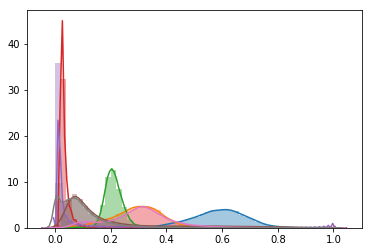

In [64]:
ndata=data
for i in range(8):
    mn=np.min(data[:,i])
    mx=np.max(data[:,i])
    avg=np.mean(data[:,i])
    ndata[:,i]=(data[:,i]-mn)/(mx-mn)
    sns.distplot(ndata[:,i])

/home/swapnil/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/swapnil/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


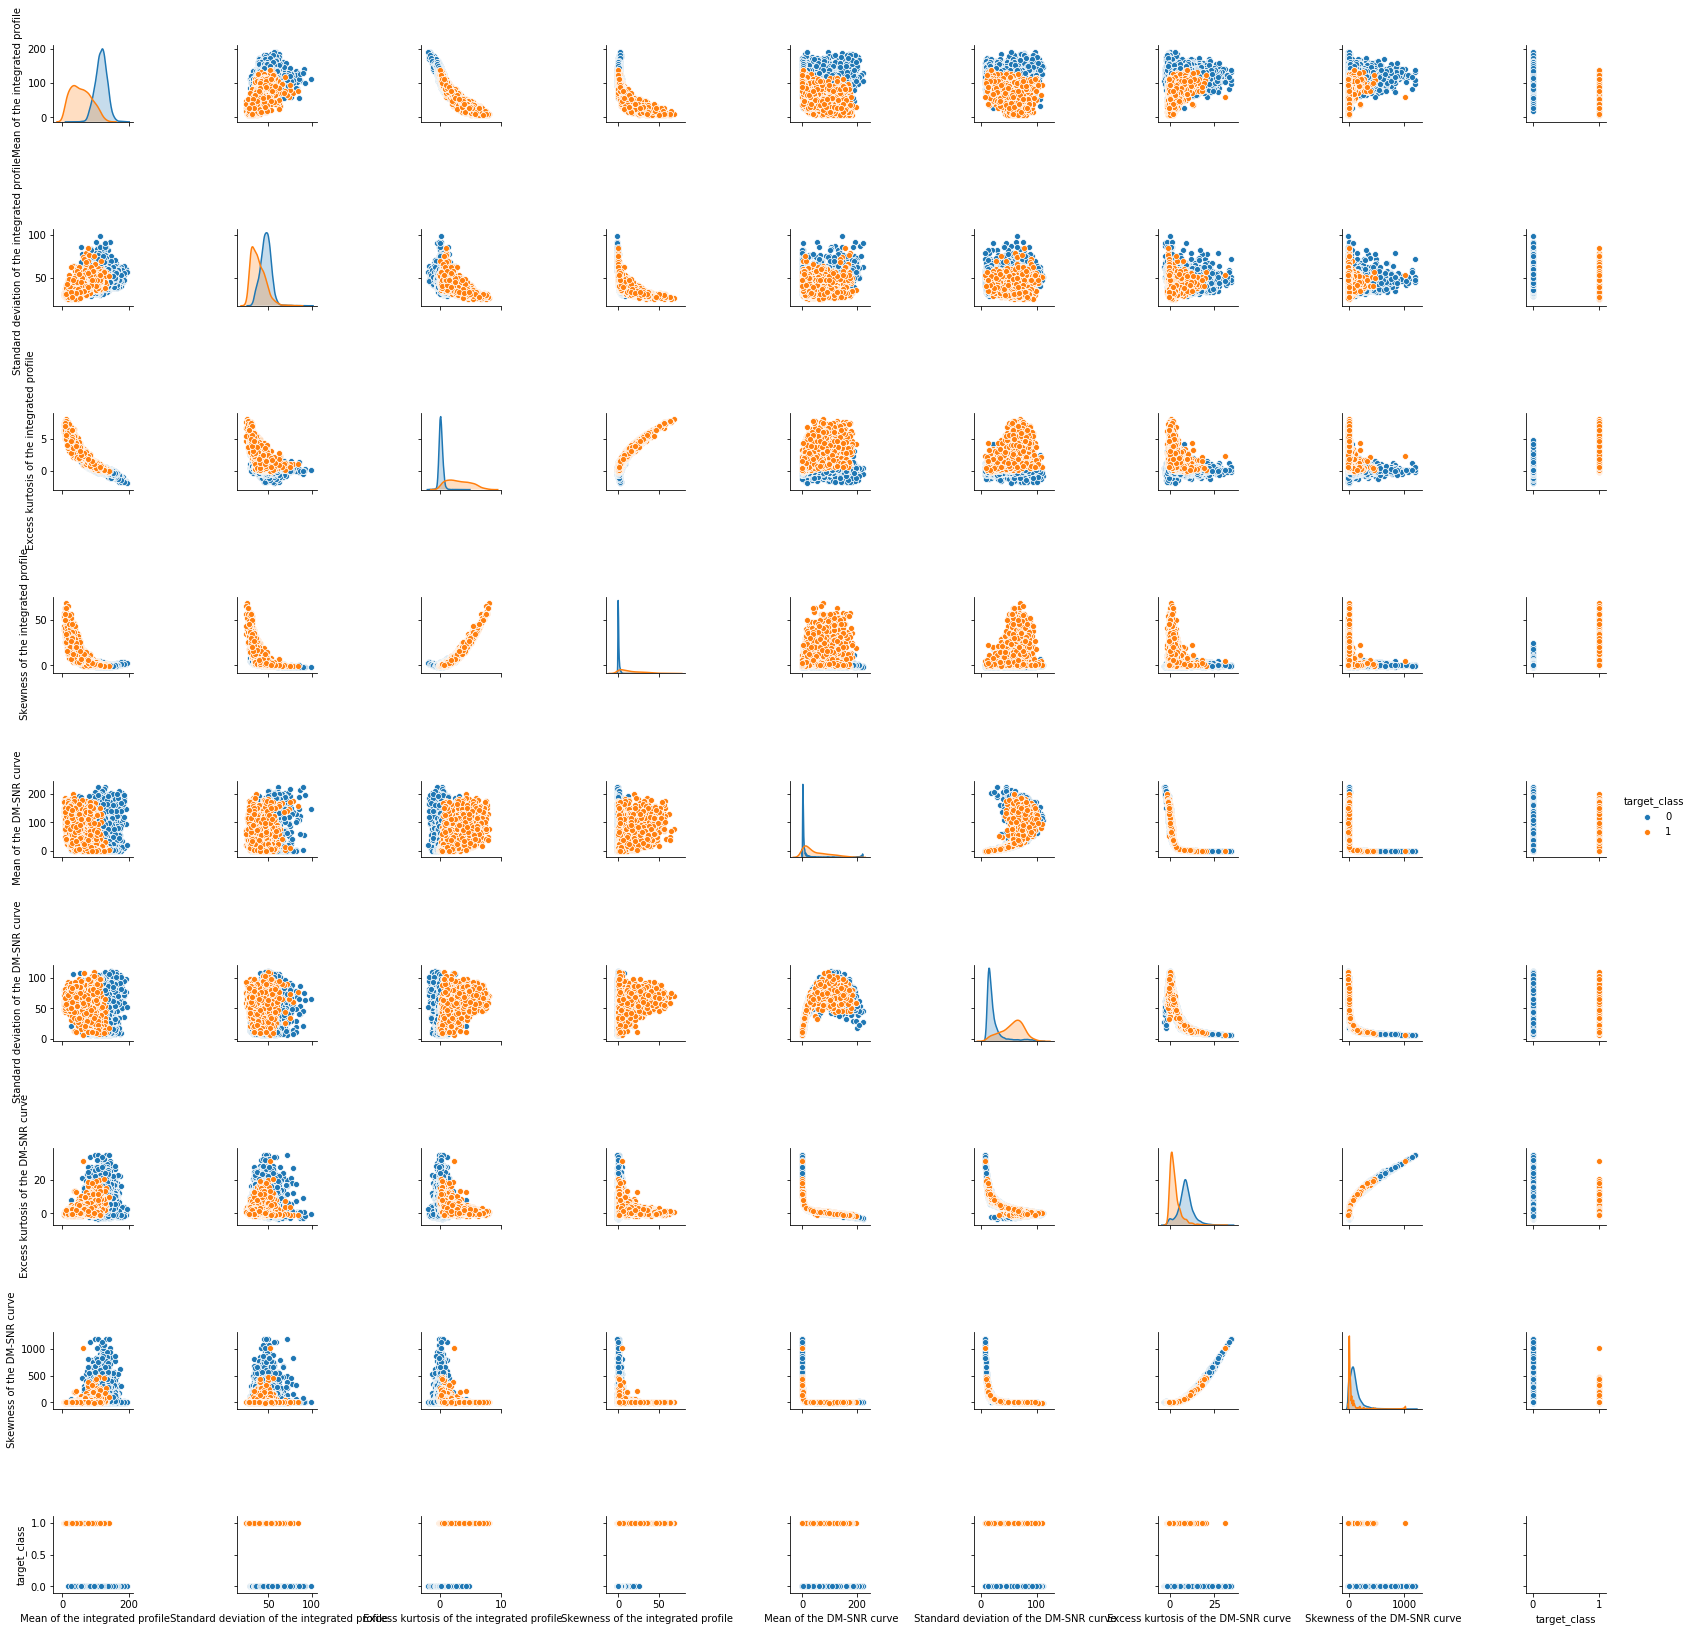

In [67]:
sns.pairplot(pdata,hue="target_class");

In [412]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# print(len(data))
principalComponents = pca.fit_transform(data[:,1:8])
pc = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
pc["target_class"]=pdata["target_class"]

In [440]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(pc,test_size = .3,random_state = 123)
from itertools import product

train_X = train[[x for x in train.columns if x not in ["target_class"]]]
train_Y = train[["target_class"]]
test_X  = test[[x for x in test.columns if x not in  ["target_class"]]]
test_Y  = test[["target_class"]]
# train_Y=1-train_Y
# test_Y=1-test_Y    

Decison areas

In [441]:
def decarea(X,y,clf1):
    from itertools import product
    import matplotlib.pyplot as plt
    from sklearn import datasets
    # Training classifiers
    x_min, x_max =X["pc1"].min() - 1, X["pc1"].max() + 1
    y_min, y_max =X["pc2"].min() - 1, X["pc2"].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X["pc1"], X["pc2"], c=y,s=20, edgecolor='g')
    plt.show()

Model

In [477]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc, matthews_corrcoef,cohen_kappa_score
def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y):
    print ("*****************************************************************************************")
    print ("MODEL - OUTPUT")
    print ("*****************************************************************************************")
    dtc=algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    print(len(predictions),len(dtest_x))
    print (algorithm)
    print(dtest_x)
    decb(dtc,dtest_x,predictions )
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    #decarea(dtest_x,predictions,dtc)
    cm=confusion_matrix(dtest_y,predictions)
    print()
    sns.heatmap(cm,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    tp=cm[1][1]
    fp=cm[0][1]
    tn=cm[0][0]
    fn=cm[1][0]
    tpr=tp/(tp+fn)
    tnr=tn/(tn+fp)
    tpnr=tpr*tnr
    matthews=matthews_corrcoef(dtest_y, predictions)
    cohans_kappa=cohen_kappa_score(dtest_y, predictions)
    #print(matthews)
    acc=(tp+tn)/(tp+fn+tn+fp)
    precision=(tp)/(tp+fp)
    recall=tp/(tp+fn)
    F1score=2*precision*recall/(precision+recall)
    #area under curve
    print()
    print()
    print()
    print()
    print()
    print()
    print()
    print()
    print()
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    print ("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    print ("\nclassification report :\n",(classification_report(dtest_y,predictions)))
    print("acc", "precision", "recall", "F1score","specificity","tpnr","matthews","cohans_kappa", "auc")
    print(acc, precision, recall, F1score,tnr, tpnr,matthews,cohans_kappa, auc(fpr,tpr))
    print(tnr)

Run decison tree

In [476]:
def decb(clf,X,y):
    #     fig, ax = plt.subplots(1, 4, figsize=(16, 3))
    #     fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)
    X=np.array(train_X.values)
    y=np.transpose(train_Y.values).reshape(-1)
    #X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
    #  for axi, depth in zip(ax, range(1, 5)):
    # model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(clf, X, y)


*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
5370 5370
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
            pc1       pc2
12536 -0.433324  0.179652
748    0.138036 -0.096369
2990  -0.226382  0.134345
11263 -0.126021 -0.046155
6567  -0.132410 -0.018845
2563  -0.163654 -0.027043
17089 -0.098994 -0.046553
16983  0.150200 -0.143930
1301  -0.062802  0.078178
682    0.008804 -0.026994
10346 -0.102201 -0.062498
15160 -0.120944  0.100850
17416 -0.146703  0.029863
12141 -0.093559  0.068274
8476  -0.066181 -0.032194
735   -0.279064  0.139859
12137 -0.037583 -0

/home/swapnil/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


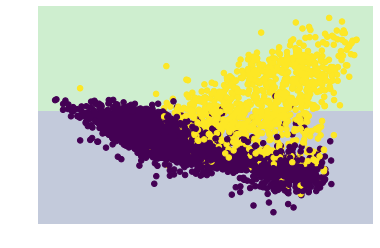

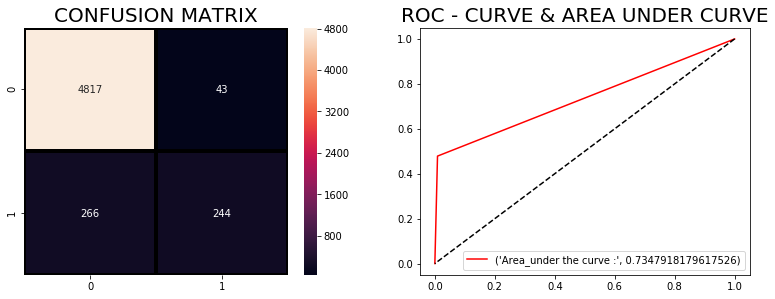

In [478]:
dt1 = DecisionTreeClassifier(max_leaf_nodes=2)
model(dt1,train_X,train_Y,test_X,test_Y)

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
5370 5370
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
            pc1       pc2
12536 -0.433324  0.179652
748    0.138036 -0.096369
2990  -0.226382  0.134345
11263 -0.126021 -0.046155
6567  -0.132410 -0.018845
2563  -0.163654 -0.027043
17089 -0.098994 -0.046553
16983  0.150200 -0.143930
1301  -0.062802  0.078178
682    0.008804 -0.026994
10346 -0.102201 -0.062498
15160 -0.120944  0.100850
17416 -0.146703  0.029863
12141 -0.093559  0.068274
8476  -0.066181 -0.032194
735   -0.279064  0.139859
12137 -0.037583 -0

/home/swapnil/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


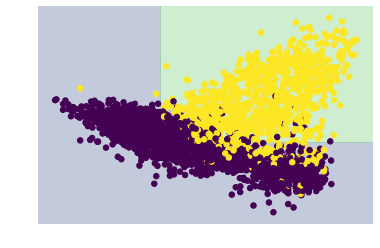

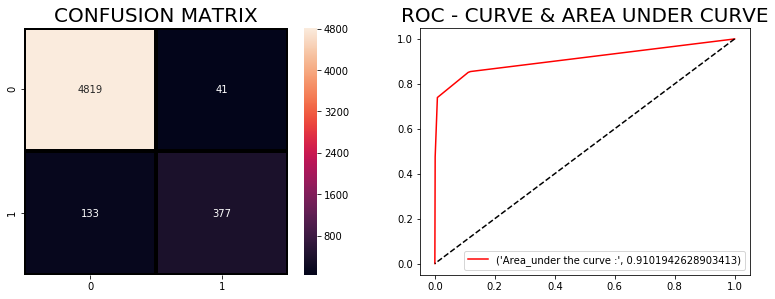

In [475]:
dt2 = DecisionTreeClassifier(max_leaf_nodes=5)
model(dt2,train_X,train_Y,test_X,test_Y)


*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
5370 5370
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
X [[ 0.9551201   0.61266082]
 [-0.06395666  0.05208107]
 [-0.2211018   0.10409704]
 ...
 [ 0.11837597 -0.10692315]
 [-0.12557698  0.00304853]
 [-0.20402579  0.15210819]]











accuracy_score : 0.9702048417132216

classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      4860
           1       0.89      0.78      0.83       510

   micro avg       0.97      0.97      0

/home/swapnil/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


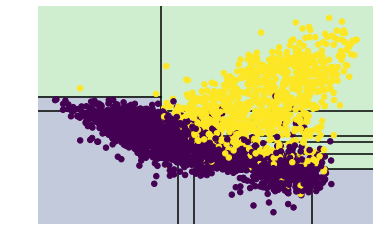

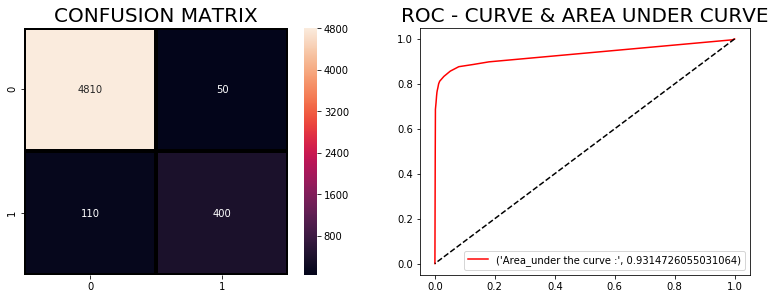

In [469]:
dt3 = DecisionTreeClassifier(max_leaf_nodes=20)
model(dt3,train_X,train_Y,test_X,test_Y)


*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
5370 5370
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
            pc1       pc2
12536 -0.433324  0.179652
748    0.138036 -0.096369
2990  -0.226382  0.134345
11263 -0.126021 -0.046155
6567  -0.132410 -0.018845
2563  -0.163654 -0.027043
17089 -0.098994 -0.046553
16983  0.150200 -0.143930
1301  -0.062802  0.078178
682    0.008804 -0.026994
10346 -0.102201 -0.062498
15160 -0.120944  0.100850
17416 -0.146703  0.029863
12141 -0.093559  0.068274
8476  -0.066181 -0.032194
735   -0.279064  0.139859
121

/home/swapnil/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)



classification report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4860
           1       0.77      0.77      0.77       510

   micro avg       0.96      0.96      0.96      5370
   macro avg       0.87      0.87      0.87      5370
weighted avg       0.96      0.96      0.96      5370

acc precision recall F1score specificity tpnr matthews cohans_kappa auc
0.9566108007448789 0.7721021611001965 0.7705882352941177 0.7713444553483807 0.9761316872427983 0.7521955942870976 0.7473761926403819 0.7473757533541294 0.87460058097313
0.9761316872427983


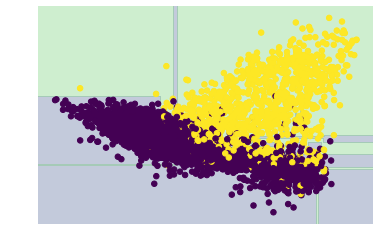

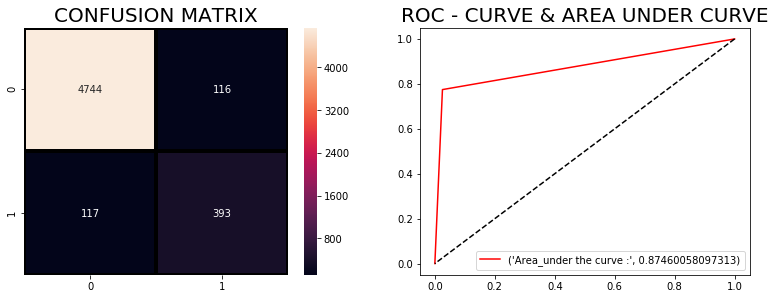

In [480]:
dt4 = DecisionTreeClassifier()
model(dt4,train_X,train_Y,test_X,test_Y)

In [479]:
from ipywidgets import interact
def visualize_tree(estimator, X, y, boundaries=False,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    print("X",X)
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)


def plot_tree_interactive(X, y):
    def interactive_tree(depth=5):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    return interact(interactive_tree, depth=[1, 5])


In [462]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

In [463]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
data[0]

array([0.72134164, 0.41768745, 0.16504291, 0.01562717, 0.01338219,
       0.11368057, 0.29498574, 0.06388987, 0.        ])

In [464]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "rg"
plot_step = 0.02

# Load data
iris = load_iris()

(np.transpose(data)[0:5],np.transpose(data)[3]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

SyntaxError: invalid syntax (<ipython-input-464-419e94003817>, line 15)

In [481]:
[0.7333333333	0.8666666667	0.8882352941	0.8735294118
0.976	0.9921052632	0.9900990099	0.9635036496
0.4784313725	0.7392156863	0.7843137255	0.7764705882
0.6421052632	0.8471910112	0.875273523	0.8599348534
0.9882352941	0.9941176471	0.9921568627	0.9705882353
0.4728027682	0.7348673587	0.7781622453	0.753633218
0.5424523439	0.7583851438	0.7938055798	0.7615447323
0.4666666667	0.7333333333	0.7764705882	0.7470588235
0.7333333333	0.9111937716	0.9336774318	0.8735294118]]

SyntaxError: invalid syntax (<ipython-input-481-44e2d334fc8b>, line 1)